In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [5]:
df = pd.read_csv("quantvision_financial_dataset_200.csv")
df.head()


,lookback_days,asset_type,market_regime,high_volatility,trend_continuation,technical_score,edge_density,slope_strength,candlestick_variance,pattern_symmetry,future_trend
0,48,equity,bullish,0,1,59.99,0.504,0.298,1.572,0.768,1
1,38,index,bullish,1,1,78.54,0.559,0.037,0.692,0.538,1
2,24,equity,bullish,1,0,56.03,0.617,0.212,1.419,0.301,1
3,52,equity,bullish,0,0,66.51,0.360,0.347,0.699,0.498,1
4,17,equity,bullish,1,1,61.21,0.492,0.144,2.520,0.828,1


#EDA

In [6]:
df.shape

(200, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lookback_days         200 non-null    int64  
 1   asset_type            200 non-null    object 
 2   market_regime         200 non-null    object 
 3   high_volatility       200 non-null    int64  
 4   trend_continuation    200 non-null    int64  
 5   technical_score       200 non-null    float64
 6   edge_density          200 non-null    float64
 7   slope_strength        200 non-null    float64
 8   candlestick_variance  200 non-null    float64
 9   pattern_symmetry      200 non-null    float64
 10  future_trend          200 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 17.3+ KB


In [8]:
df.isnull().sum()

,0
lookback_days,0
asset_type,0
market_regime,0
high_volatility,0
trend_continuation,0
technical_score,0
edge_density,0
slope_strength,0
candlestick_variance,0
pattern_symmetry,0


In [9]:
df['future_trend'].value_counts()

,count
future_trend,
1,187
0,13


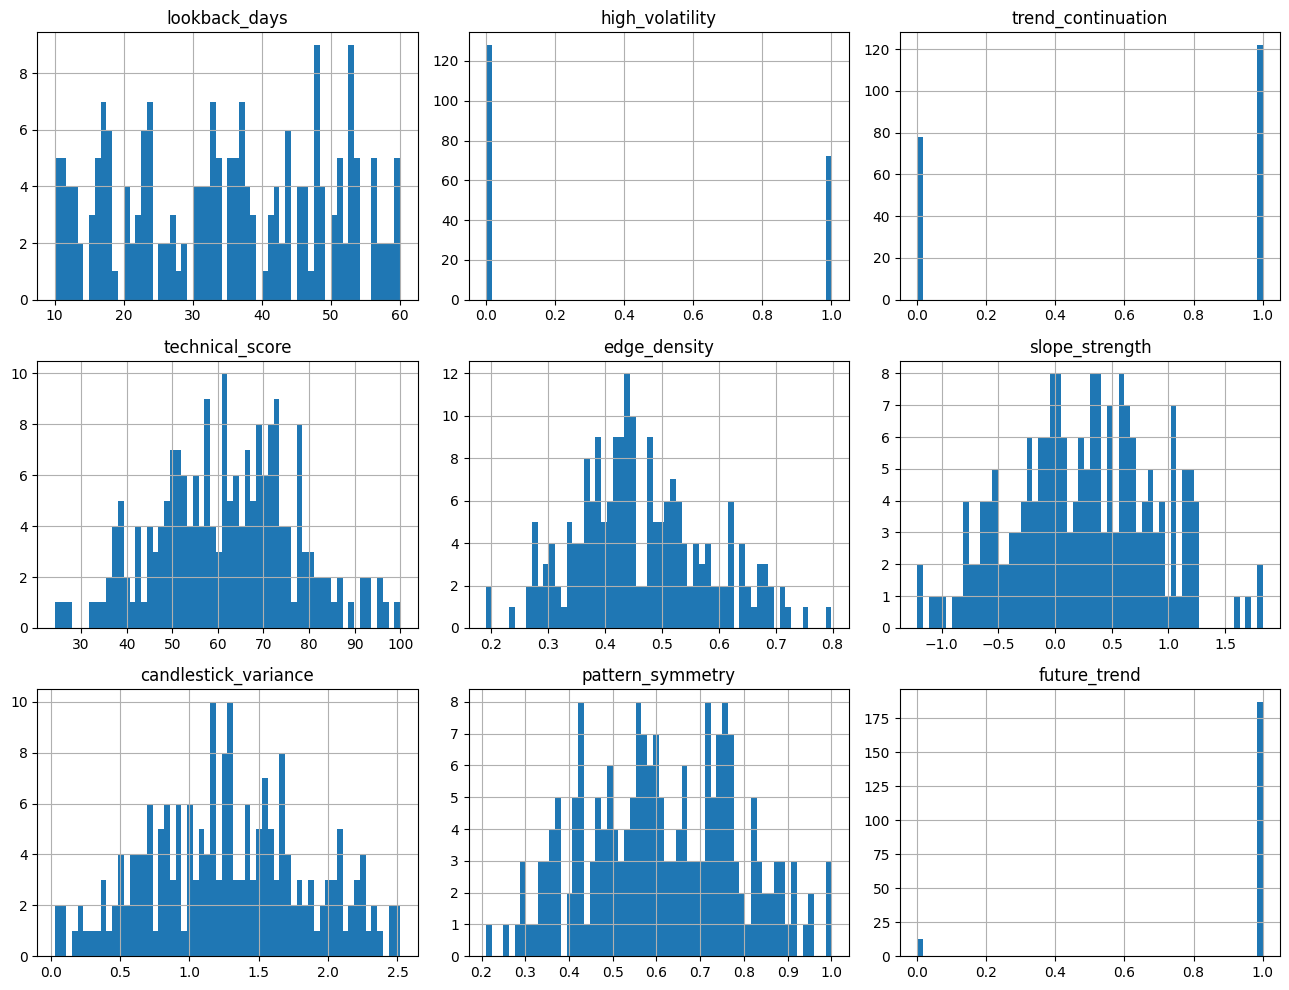

In [10]:
df.hist(figsize=(13,10), bins=60)
plt.tight_layout()
plt.show()


<Axes: >

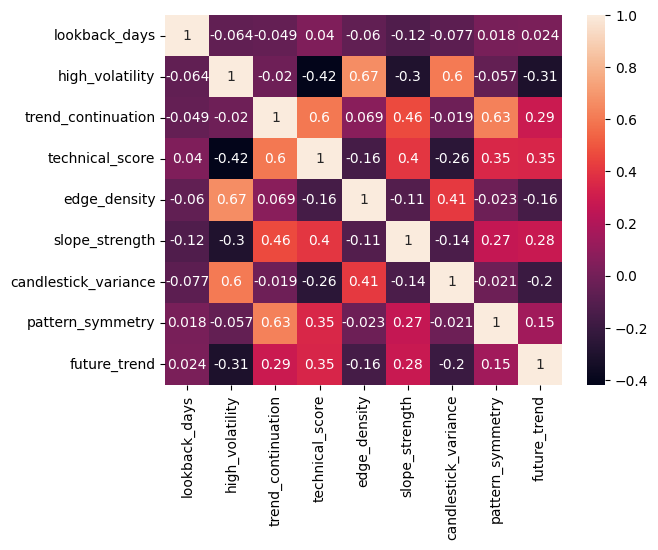

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [12]:
x = df.drop('future_trend', axis=1)
y = df['future_trend']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



Encoding and Scaling

In [14]:
categorical_features = ['asset_type', 'market_regime']
numerical_features = ['lookback_days','technical_score','edge_density','slope_strength','candlestick_variance','pattern_symmetry','high_volatility','trend_continuation']


In [35]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features),
                                               ('cat', categorical_transformer, categorical_features)])

Splitting the dataset.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=25, stratify=y)


Applying Logistic regression.

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000))])

logistic_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lookback_days',
                                                   'technical_score',
                                                   'edge_density',
                                                   'slope_strength',
                                                   'candlestick_variance',
                                                   'pattern_symmetry',
                                                   'high_volatility',
                                                   'trend_continuation']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['asset_type',
                                                   'market_regime'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = logistic_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

Accuracy: 0.9
Precision: 0.9459459459459459
Recall: 0.9459459459459459
F1 Score: 0.9459459459459459


In [38]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.95      0.95      0.95        37

    accuracy                           0.90        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.90      0.90      0.90        40



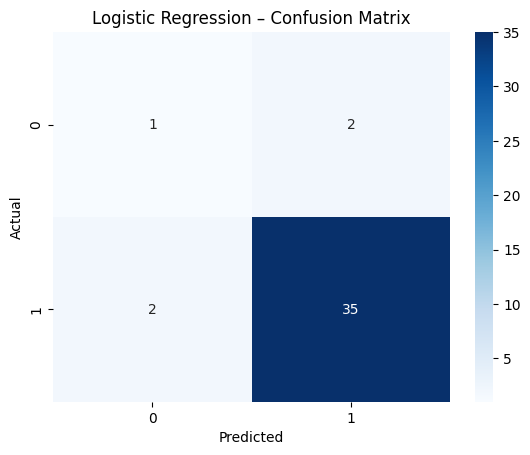

In [39]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Applying Logistic regression with K-Fold Cross Validation.

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv_results = cross_validate(logistic_model,x,y,cv=skf,scoring=['accuracy', 'precision', 'recall', 'f1'])

pd.DataFrame(lr_cv_results)


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.024477,0.023185,0.925,0.972973,0.947368,0.960000
1,0.019377,0.022338,0.925,0.948718,0.973684,0.961039
2,0.019061,0.023891,0.925,0.925000,1.000000,0.961039
3,0.023180,0.023030,0.925,0.925000,1.000000,0.961039
4,0.018745,0.023531,0.900,0.923077,0.972973,0.947368


In [52]:
pd.DataFrame(lr_cv_results).mean()

,0
fit_time,0.020968
score_time,0.023195
test_accuracy,0.920000
test_precision,0.938954
test_recall,0.978805
test_f1,0.958097


Applying Neural Network Model.(MLP)

In [53]:
from sklearn.neural_network import MLPClassifier

mlp_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', MLPClassifier(hidden_layer_sizes=(16, 8),
                    alpha=0.05,early_stopping=True,max_iter=10000,random_state=42))])
mlp_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lookback_days',
                                                   'technical_score',
                                                   'edge_density',
                                                   'slope_strength',
                                                   'candlestick_variance',
                                                   'pattern_symmetry',
                                                   'high_volatility',
                                                   'trend_continuation']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['asset_type',
                                                   'market_regime'])])),
                ('classifier',
                 MLPClassifier(alpha=0.05, early_stopping=True,
                               hidden_layer_sizes=(16, 8), max_iter=10000,
                               random_state=42))])

In [42]:
y_pred_mlp = mlp_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))


Accuracy: 0.925
Precision: 0.925
Recall: 1.0
F1 Score: 0.961038961038961


In [43]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      1.00      0.96        37

    accuracy                           0.93        40
   macro avg       0.46      0.50      0.48        40
weighted avg       0.86      0.93      0.89        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


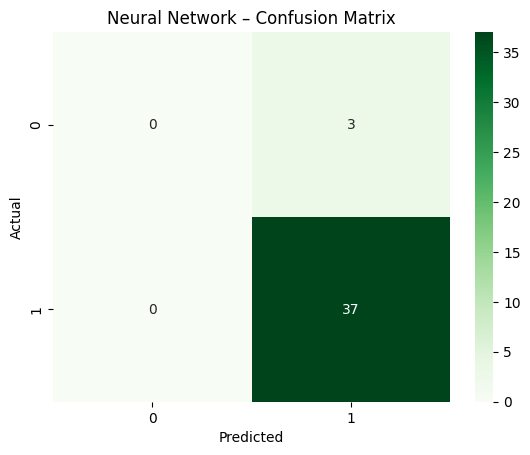

In [44]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

MLP Cross Validation Results.

In [45]:
mlp_cv_results = cross_validate(mlp_model,x,y,cv=skf,scoring=['accuracy', 'precision', 'recall', 'f1'])

pd.DataFrame(mlp_cv_results).mean()


,0
fit_time,0.026687
score_time,0.017009
test_accuracy,0.935000
test_precision,0.935000
test_recall,1.000000
test_f1,0.966367


Comparison of both models.

In [47]:
lr_metrics = {"Model": "Logistic Regression","Accuracy": accuracy_score(y_test, y_pred_lr),"Precision": precision_score(y_test, y_pred_lr),
              "Recall": recall_score(y_test, y_pred_lr),"F1 Score": f1_score(y_test, y_pred_lr)}

mlp_metrics = {"Model": "Neural Network (MLP)","Accuracy": accuracy_score(y_test, y_pred_mlp),"Precision": precision_score(y_test, y_pred_mlp),
               "Recall": recall_score(y_test, y_pred_mlp),"F1 Score": f1_score(y_test, y_pred_mlp)}

print("Comparison Table:")
comparison_df = pd.DataFrame([lr_metrics, mlp_metrics])
comparison_df

Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.900,0.945946,0.945946,0.945946
1,Neural Network (MLP),0.925,0.925000,1.000000,0.961039


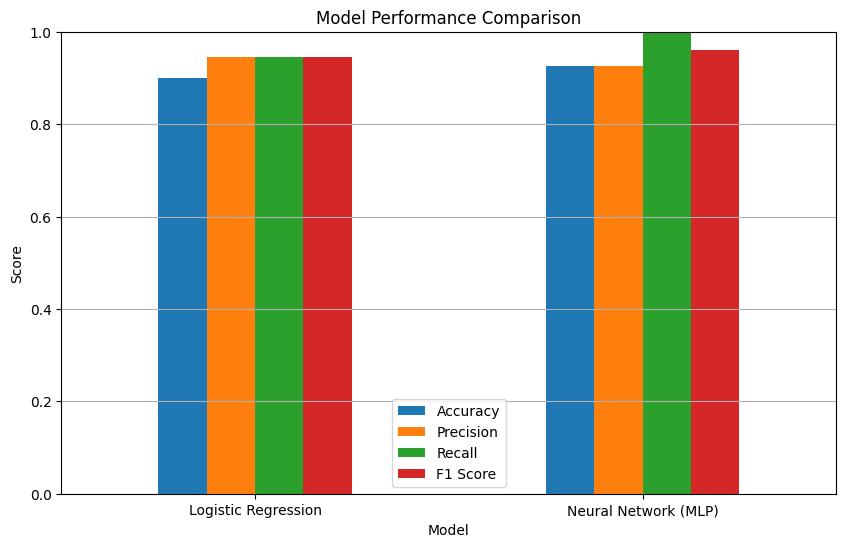

In [49]:
comparison_df.set_index("Model").plot(kind='bar',figsize=(10,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


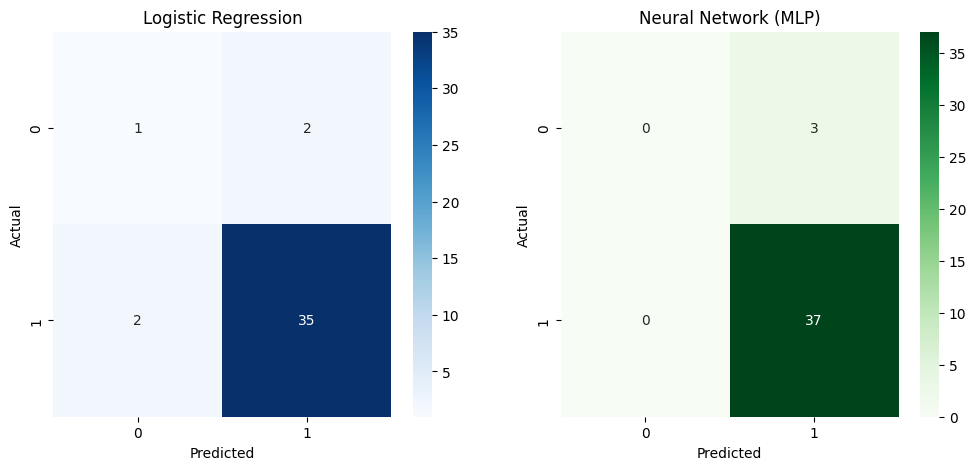

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Neural Network (MLP)")

for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()


On analysing the result, we can sat that-


*   Logistic Regression performs reasonably well because several features in the dataset have a direct and approximately linear relationship with the target variable.
However, Logistic Regression is limited in its ability to model complex non-linear interactions between features.
*   The Neural Network performs better overall by capturing non-linear patterns and achieving perfect recall, making it more suitable for predicting upward price trends in this dataset.

The Neural Network also carries a higher risk of overfitting, especially given the small dataset size. Without careful regularization and validation, it may learn noise rather than true market structure.

Given the small dataset, the model's performance should be interpreted cautiously, that's why we validated them using cross-validation.

*   Volatility is very importnat in interpretation of data by the models. During high-volatility periods, price movements become less predictable, and technical indicators may generate misleading signals.

In financial terms, volatility increases uncertainty and reduces the predictive power of historical patterns, explaining why errors are more common during turbulent market phases in the model.

# Financial Interpretation



*   Volatility is very importnat in interpretation of data by the models. During high-volatility periods, price movements become less predictable, and technical indicators may generate misleading signals.
In financial terms, volatility increases uncertainty and reduces the predictive power of historical patterns, explaining why errors are more common during turbulent market phases in the model.

*   Trend continuation is another influential features in both models. Financial markets often exhibit momentum, where existing trends persist for short to medium time horizons. High trend continuation significantly increases the probability of a positive future trend, which aligns with well-known momentum-based trading strategies, which the model can innterpret.


# Situations where models fail



*   When the market goes sideways, patterns become noisy and indicators lose predictive power.
*   Small dataset like ours create significant biases and can reduce the model's ability to interpret daily market conditions.
*   High Volatility sometimes with weak confirmation features can often result in misclassification.

